In [28]:
# Import the necessary libraries for the task.
import torch  # Import PyTorch for deep learning.
import torch.nn as nn  # Import the neural network module from PyTorch.
import torch.nn.functional as F  # Import the functional module from PyTorch for activation functions.
import matplotlib.pyplot as plt  # Import Matplotlib for plotting.
import numpy as np  # Import NumPy for numerical operations.


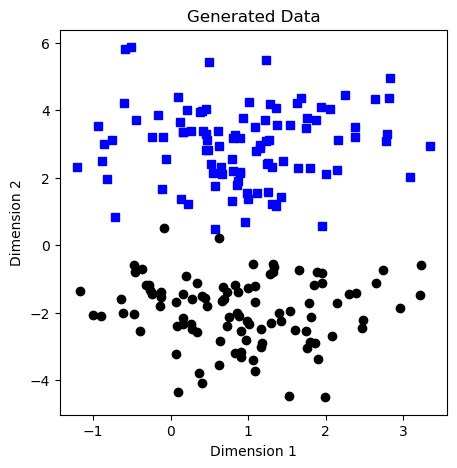

In [29]:
# Set parameters for data generation.
num_points_per_cluster = 100  # Number of data points per cluster.
blur_factor = 1  # Blurring factor.

num_epochs = 500

# Define cluster centers.
center_A = [1, 3]
center_B = [1, -2]

# Generate data for two clusters.
cluster_a = [center_A[0] + np.random.randn(num_points_per_cluster) * blur_factor,
             center_A[1] + np.random.randn(num_points_per_cluster) * blur_factor]
cluster_b = [center_B[0] + np.random.randn(num_points_per_cluster) * blur_factor,
             center_B[1] + np.random.randn(num_points_per_cluster) * blur_factor]

# Create true labels.
labels_np = np.vstack((np.zeros((num_points_per_cluster, 1)), np.ones((num_points_per_cluster, 1))))

# Concatenate data into a matrix.
data_np = np.hstack((cluster_a, cluster_b)).T

# Convert data to a PyTorch tensor and set the data type to float.
custom_data = torch.tensor(data_np).float()
custom_labels = torch.tensor(labels_np).float()

# Plot the generated data.
fig = plt.figure(figsize=(5, 5))
plt.plot(custom_data[np.where(custom_labels == 0)[0], 0], custom_data[np.where(custom_labels == 0)[0], 1], 'bs')
plt.plot(custom_data[np.where(custom_labels == 1)[0], 0], custom_data[np.where(custom_labels == 1)[0], 1], 'ko')
plt.title('Generated Data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


In [30]:
# Define a function 'create_custom_ann_model' to create the artificial neural network (ANN) model.
def create_custom_ann_model(learning_rate):

    # Define the custom ANN class 'CustomANN'.
    class CustomANN(nn.Module):
        def __init__(self):
            super().__init__()

            # Input layer.
            self.input_layer = nn.Linear(2, 16)

            # Hidden layer.
            self.hidden_layer = nn.Linear(16, 1)

            # Output layer.
            self.output_layer = nn.Linear(1, 1)

        # Forward pass through the network.
        def forward(self, x):

            # Input layer with ReLU activation.
            x = F.relu(self.input_layer(x))

            # Hidden layer with ReLU activation.
            x = self.hidden_layer(x)
            x = F.relu(x)

            # Output layer with sigmoid activation.
            x = self.output_layer(x)
            x = torch.sigmoid(x)
            return x

    # Create an instance of the 'CustomANN' model.
    custom_ann_model = CustomANN()

    # Define the loss function (Binary Cross-Entropy Loss).
    loss_function = nn.BCELoss()

    # Define the optimizer (Stochastic Gradient Descent).
    custom_optimizer = torch.optim.SGD(custom_ann_model.parameters(), lr=learning_rate)

    # Return the ANN model, loss function, and optimizer.
    return custom_ann_model, loss_function, custom_optimizer


In [31]:
# Define a function 'train_custom_model' to train the ANN model.
def train_custom_model(custom_ann_model):
    
    # Initialize losses.
    custom_losses = torch.zeros(num_epochs)

    # Loop over epochs for training.
    for epoch_idx in range(num_epochs):

        # Forward pass through the model.
        predictions = custom_ann_model(custom_data)

        # Compute the Binary Cross-Entropy loss.
        loss = loss_function(predictions, custom_labels)
        custom_losses[epoch_idx] = loss

        # Backpropagation.
        custom_optimizer.zero_grad()
        loss.backward()
        custom_optimizer.step()

    # Final forward pass to get predictions.
    final_predictions = custom_ann_model(custom_data)

    # Compute accuracy as the percentage of correct predictions.
    accuracy = 100 * torch.mean(((final_predictions > 0.5) == custom_labels).float())

    # Return losses, predictions, and accuracy.
    return custom_losses, final_predictions, accuracy


Final accuracy: 99%


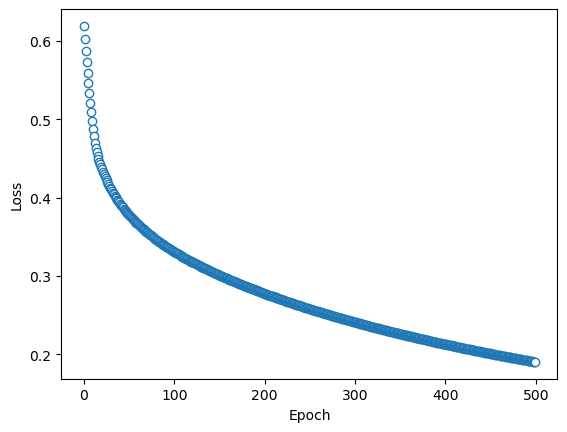

In [32]:
# Create an ANN model, loss function, and optimizer with a specified learning rate.
custom_ann_model, loss_function, custom_optimizer = create_custom_ann_model(0.01)

# Train the model and get losses, predictions, and accuracy.
custom_losses, custom_predictions, custom_accuracy = train_custom_model(custom_ann_model)

# Report the final accuracy.
print('Final accuracy: %g%%' % custom_accuracy)

# Plot the training losses.
plt.plot(custom_losses.detach(), 'o', markerfacecolor='w', linewidth=0.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [33]:
# Define an array of learning rates to experiment with.
custom_learning_rates = np.linspace(0.001, 0.1, 50)

# Initialize lists to store accuracy and losses.
accuracy_by_lr = []
all_losses = np.zeros((len(custom_learning_rates), num_epochs))

# Loop over different learning rates.
for i, lr in enumerate(custom_learning_rates):
  
    # Create and train the ANN model for the current learning rate.
    custom_ann_model, loss_function, custom_optimizer = create_custom_ann_model(lr)
    losses, predictions, accuracy = train_custom_model(custom_ann_model)

    # Store the results.
    accuracy_by_lr.append(accuracy)
    all_losses[i, :] = losses.detach()


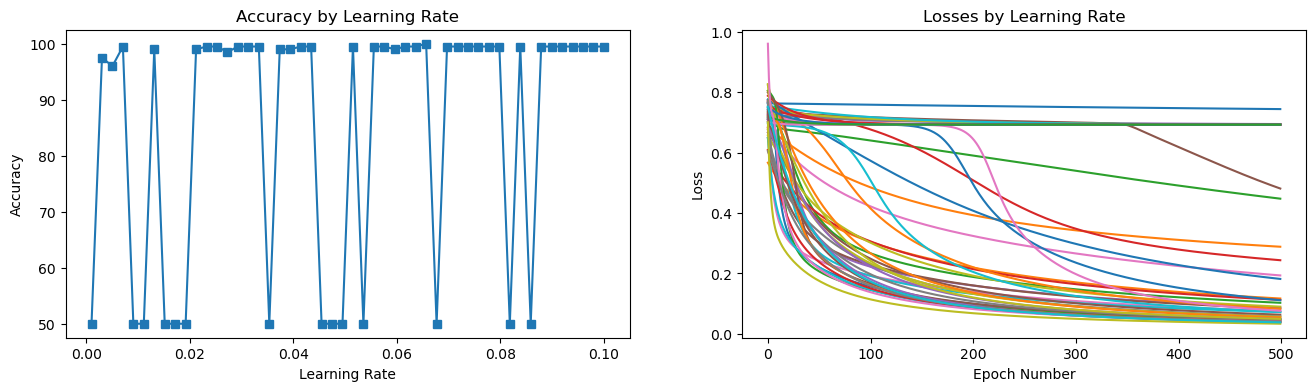

In [34]:
# Create subplots for accuracy vs. learning rate and losses by learning rate.
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

# Plot accuracy vs. learning rate.
ax[0].plot(custom_learning_rates, accuracy_by_lr, 's-')
ax[0].set_xlabel('Learning Rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by Learning Rate')

# Plot losses by learning rate.
ax[1].plot(all_losses.T)
ax[1].set_title('Losses by Learning Rate')
ax[1].set_xlabel('Epoch Number')
ax[1].set_ylabel('Loss')
plt.show()


In [35]:
# Calculate the fraction of learning rates with accuracy greater than 70%.
percentage_above_70 = sum(torch.tensor(accuracy_by_lr) > 70) / len(accuracy_by_lr)

percentage_above_70

tensor(0.7200)